# Rotating Coild Data Analysis for TB Corrector Magnets

## Import libraries and Load measurement data

In [1]:
import sys
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from lnls.rotcoil import *

In [2]:
# Define serial numbers, one for each magnet

serials = [
    '01', '02', '03', '04', '05', '06',
]

# Load all data
RotCoilMeas_TBCorH.family_folder = ''
data = MagnetsAnalysis(RotCoilMeas_TBCorH, serials)
data.init()

# Print info
data.print_info()

index: 00, serial_number: 01, data sets: ['M1', 'anterior']
index: 01, serial_number: 02, data sets: ['M1', 'anterior']
index: 02, serial_number: 03, data sets: ['M1']
index: 03, serial_number: 04, data sets: ['M1']
index: 04, serial_number: 05, data sets: ['M1']
index: 05, serial_number: 06, data sets: ['M1']


## Maximum Integrated Quadrupole

In [3]:
# gets integrated strength at maximum current for all magnets
data.main_intmpole_at_max_current('M1')

index:00, serial:01, idx:05, max_current:   +10.0003 [A], diff_spec: +55.13 [%]
index:01, serial:02, idx:05, max_current:    +9.9998 [A], diff_spec: +55.09 [%]
index:02, serial:03, idx:05, max_current:   +10.0002 [A], diff_spec: +54.88 [%]
index:03, serial:04, idx:05, max_current:   +10.0001 [A], diff_spec: +55.17 [%]
index:04, serial:05, idx:05, max_current:   +10.0002 [A], diff_spec: +54.82 [%]
index:05, serial:06, idx:05, max_current:   +10.0001 [A], diff_spec: +55.15 [%]


<IPython.core.display.Javascript object>


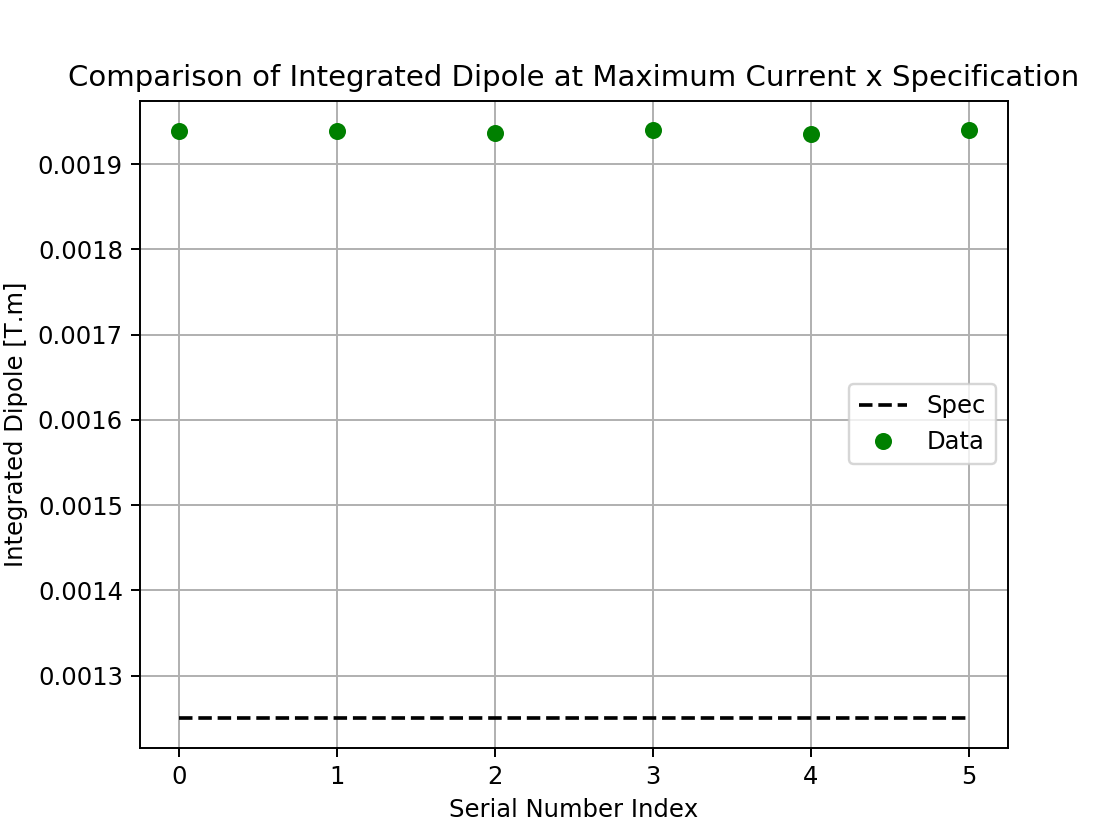

In [4]:
# plot data comparison with spec
plt.figure()
data.main_intmpole_at_max_current_plot(plt)
plt.show()

## Magnetic Center

<IPython.core.display.Javascript object>


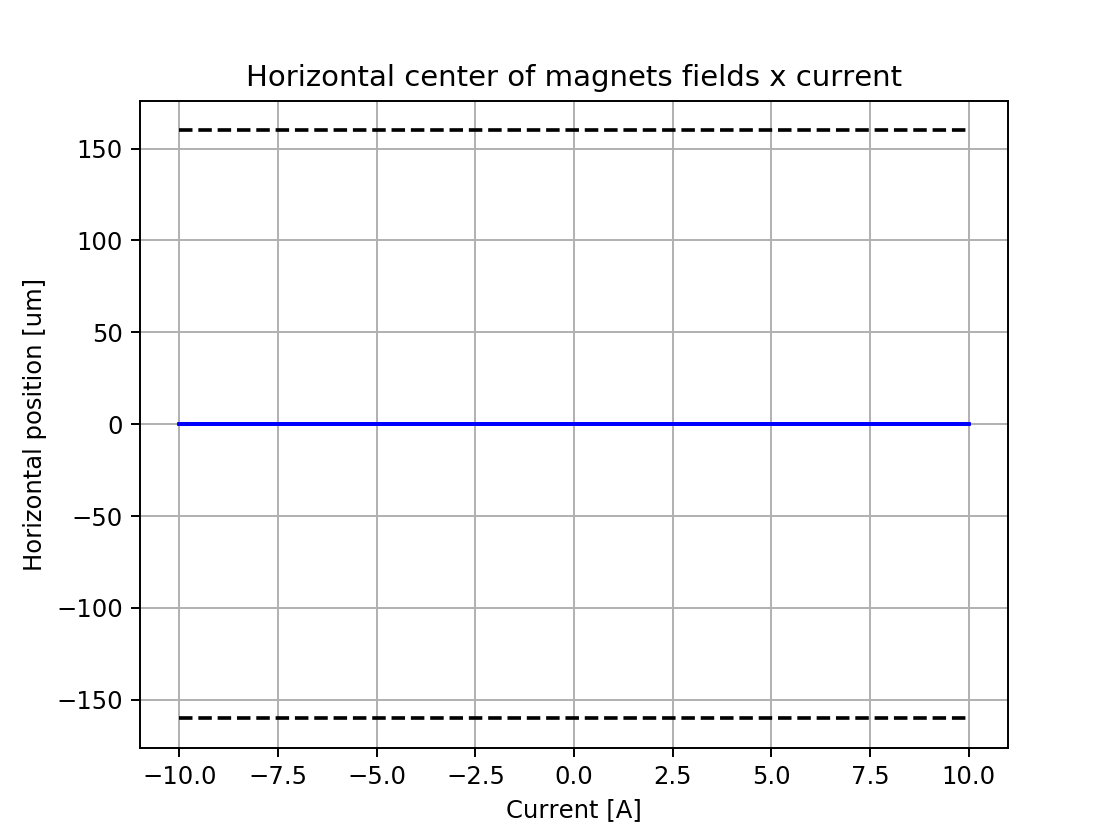

Horizontal center at maximum current [um]: +0.00 ± 0.00


<IPython.core.display.Javascript object>


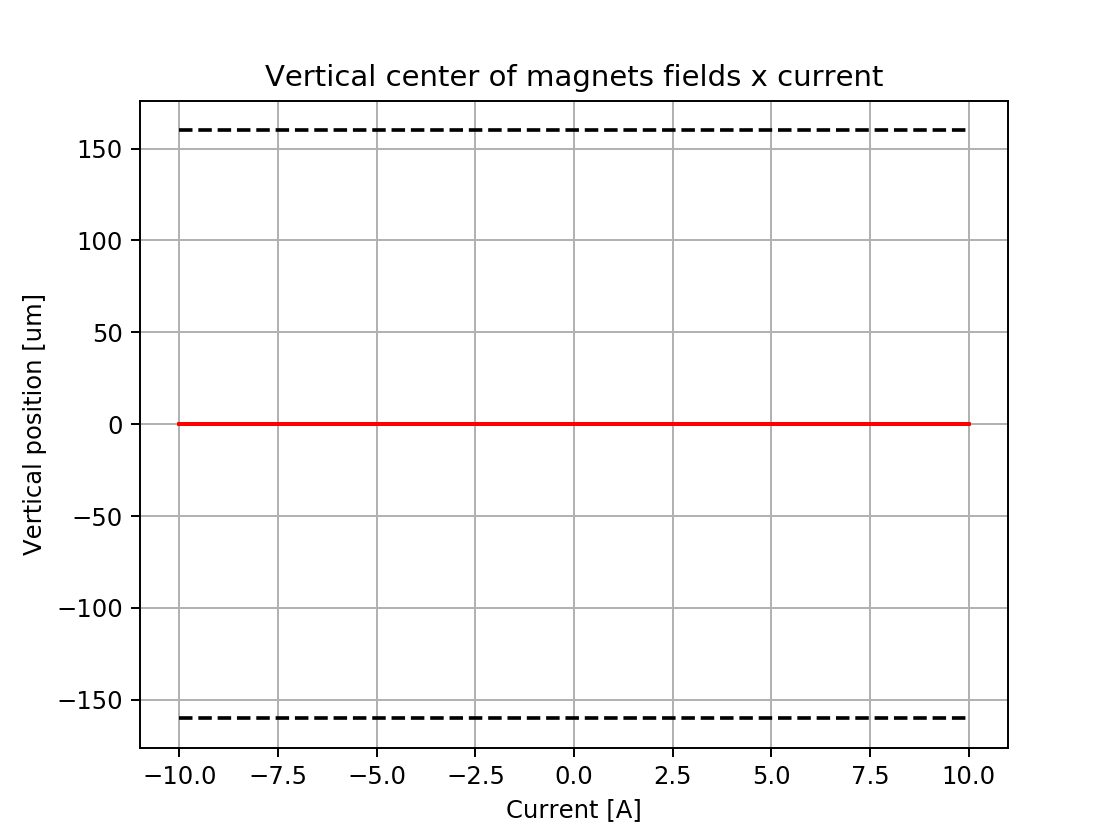

Vertical center at maximum current [um]: +0.00 ± 0.00


In [5]:
# Horizontal center for all magnets x currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'X', plt)
plt.show()

# Vertical center for all magnets y currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'Y', plt)
plt.show()

<IPython.core.display.Javascript object>


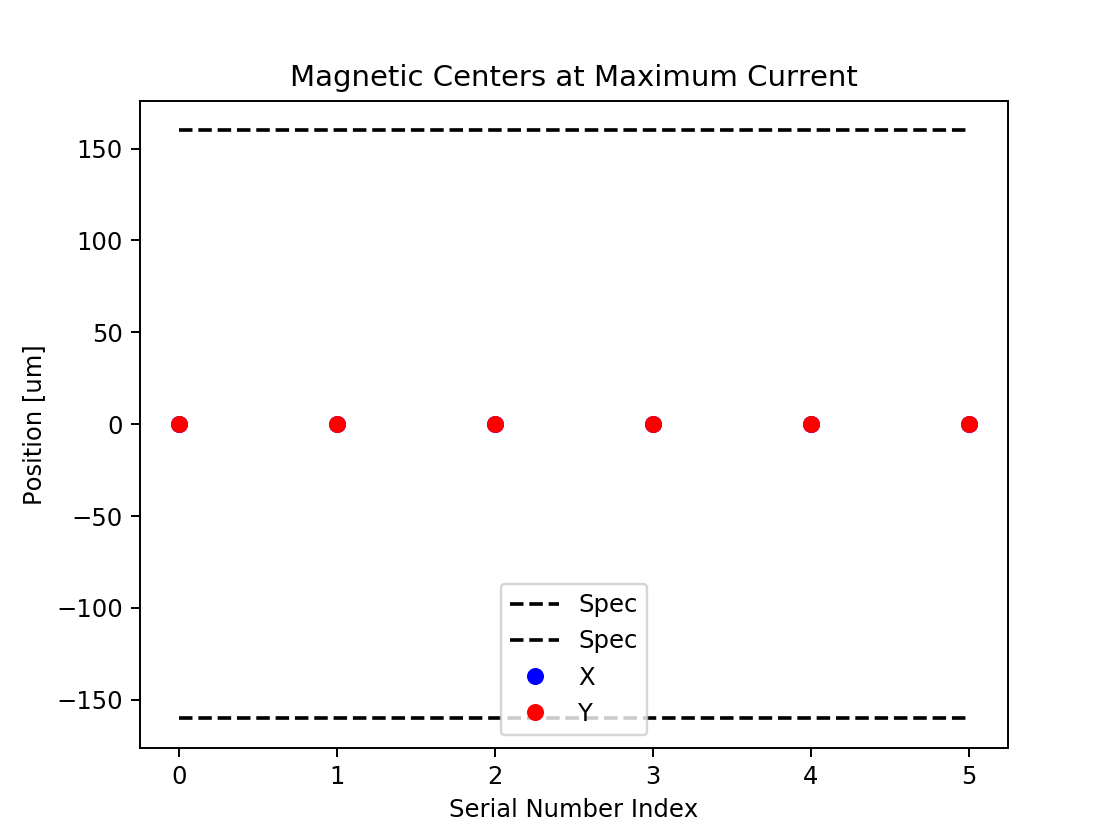

<IPython.core.display.Javascript object>


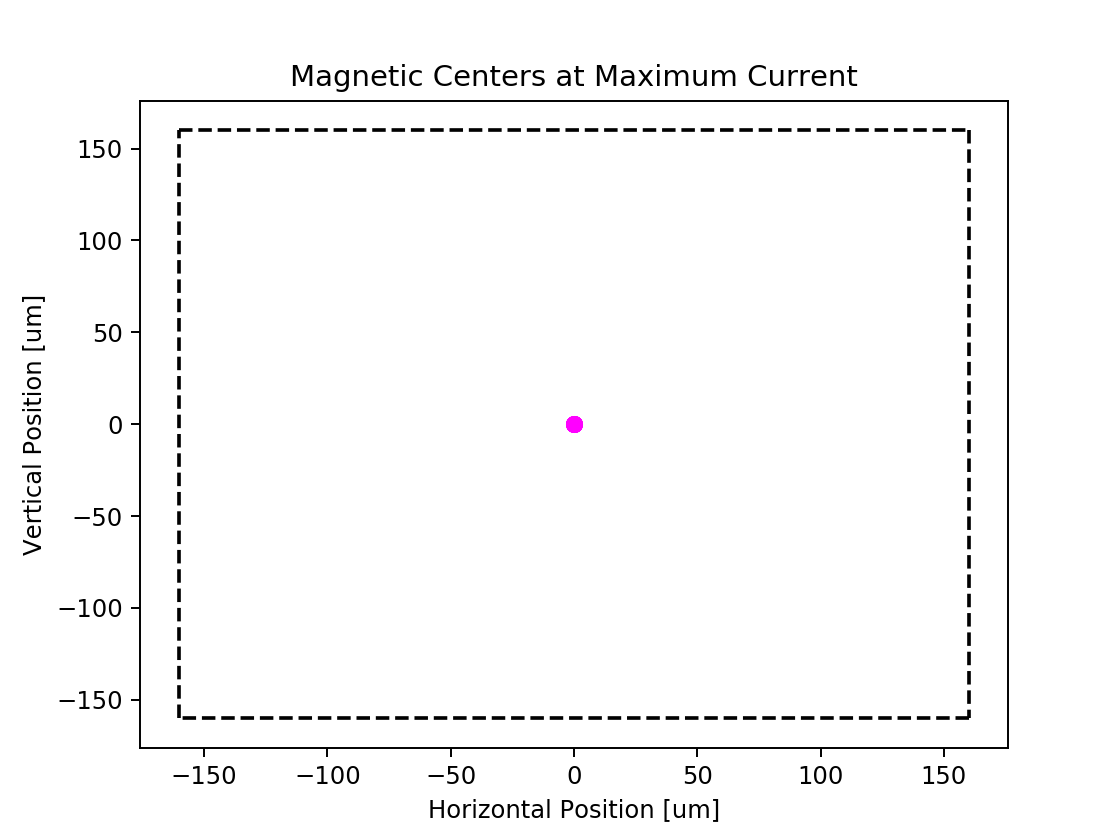

In [6]:
# Horizontal and vertical positions of all magnets
plt.figure()
data.magnetic_center_plot('M1', plt)
plt.show()

# Transverse plane positions
plt.figure()
data.magnetic_center_transverse_plot('M1', plt)
plt.show()

## Ramp Up

<IPython.core.display.Javascript object>


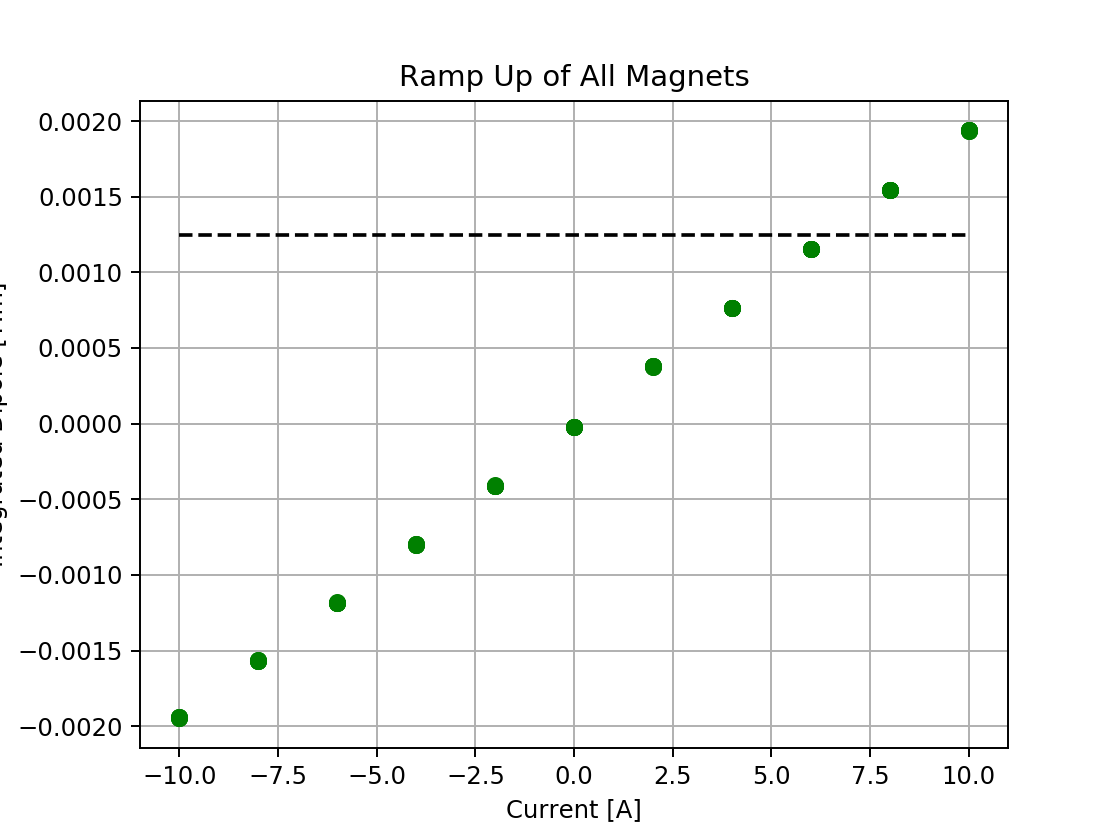

Nominal Integrated Dipole [T.m]:



In [6]:
# Plot rampup integrated strength of main multipole and compare it to nominal values and maximum spec

plt.figure()
data.rampup_excitation_curve_plot('M1', plt)
plt.show()

# Print currents for nominal strengths
print()
d = data.tmpl.get_nominal_main_intmpole_values(0.15)
for fam, gl in d.items():
    c = data.tmpl.rampup_main_mpole_2_curr('M1', gl)
    print('{:<15s}: {:05.1f} A'.format(fam, c))

<IPython.core.display.Javascript object>


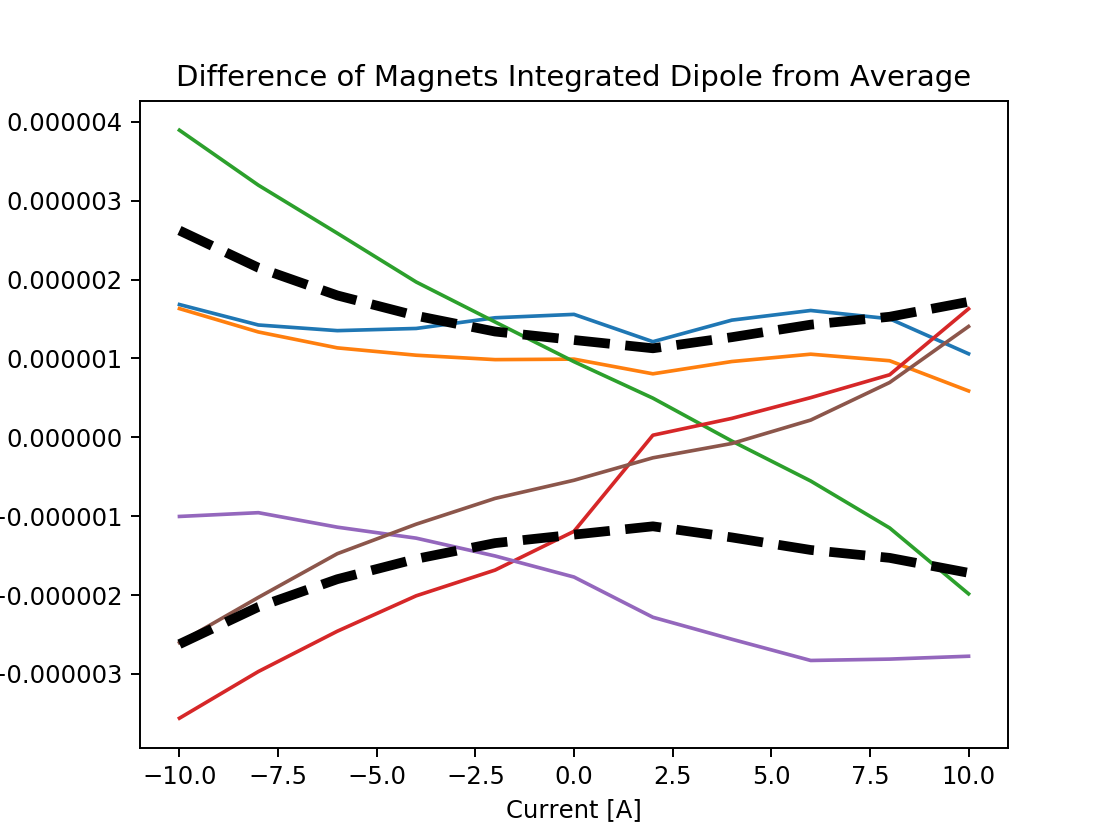

(6, 11)


In [8]:
# Plot rampup dispersion amongst magnets

plt.figure()
data.rampup_excitation_curve_dispersion_plot('M1', plt)
plt.show()

In [7]:
# Print random integrated main strength for various currents

data.rampup_excitation_curve_rms_error_print('M1')

current 00:  -10.000 [A], rms_error:  0.1349 [%], max_error:  0.2003 [%]
current 01:   -8.000 [A], rms_error:  0.1372 [%], max_error:  0.2054 [%]
current 02:   -6.000 [A], rms_error:  0.1519 [%], max_error:  0.2180 [%]
current 03:   -4.000 [A], rms_error:  0.1930 [%], max_error:  0.2649 [%]
current 04:   -2.000 [A], rms_error:  0.3267 [%], max_error:  0.4077 [%]
current 05:   -0.000 [A], rms_error:  5.9939 [%], max_error:  8.6872 [%]
current 06:   +2.000 [A], rms_error:  0.2988 [%], max_error:  0.6041 [%]
current 07:   +4.000 [A], rms_error:  0.1660 [%], max_error:  0.3362 [%]
current 08:   +6.000 [A], rms_error:  0.1237 [%], max_error:  0.2445 [%]
current 09:   +8.000 [A], rms_error:  0.0989 [%], max_error:  0.1872 [%]
current 10:  +10.000 [A], rms_error:  0.0886 [%], max_error:  0.1425 [%]


<IPython.core.display.Javascript object>


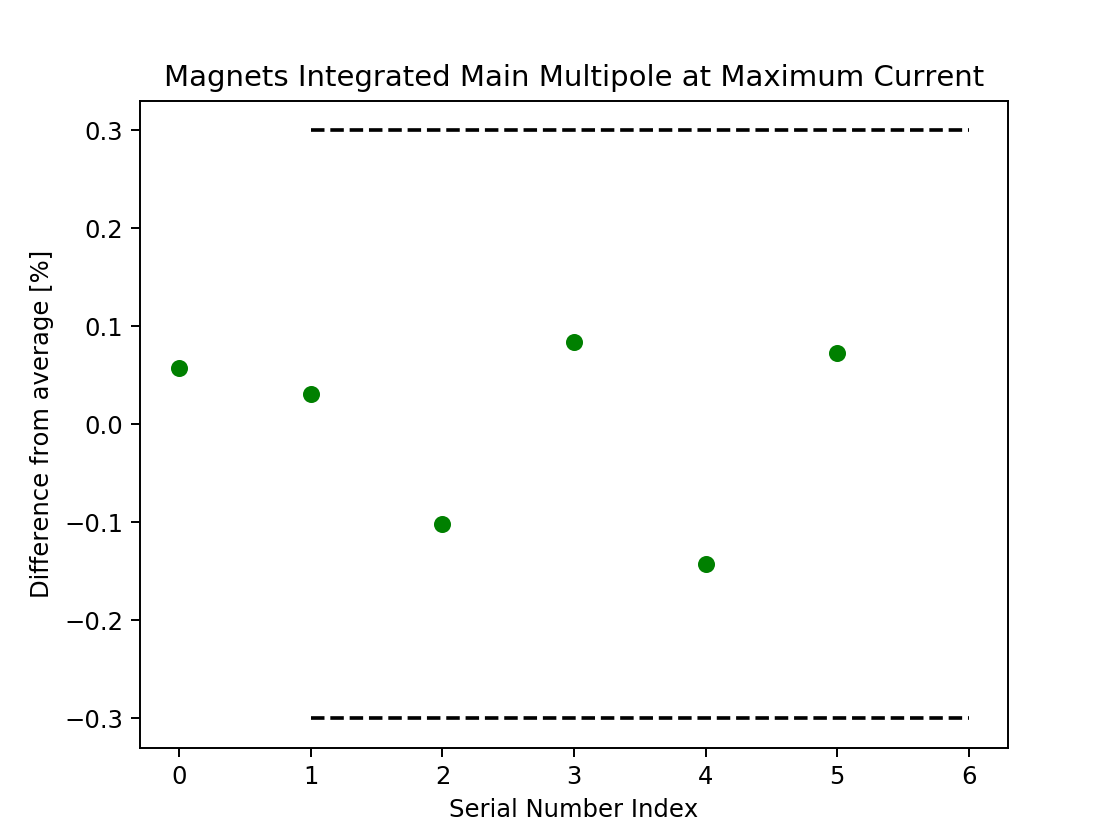

In [8]:
# Plot Integrated Quadrupole Error for maximum current

plt.figure()
data.rampup_excitation_curve_rms_error_plot(plt)
plt.show()

# Gradient Roll Error

<IPython.core.display.Javascript object>


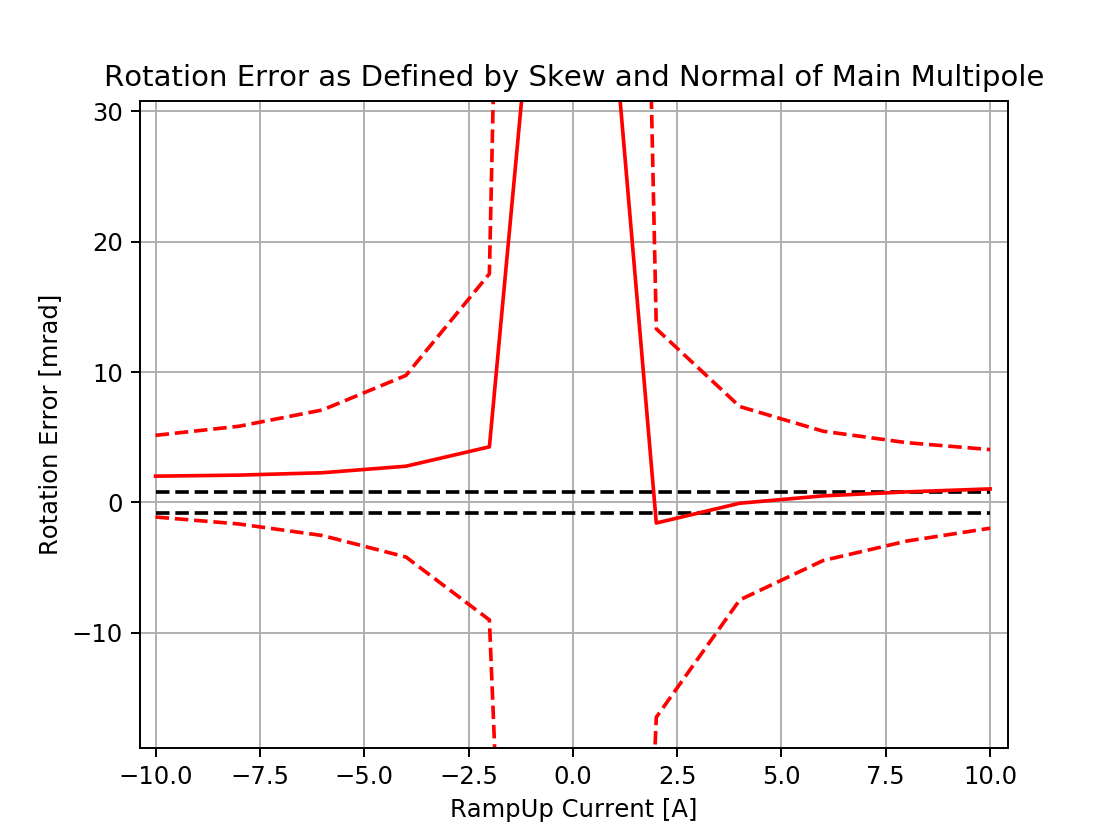

Currents for nominal strengths:


<IPython.core.display.Javascript object>


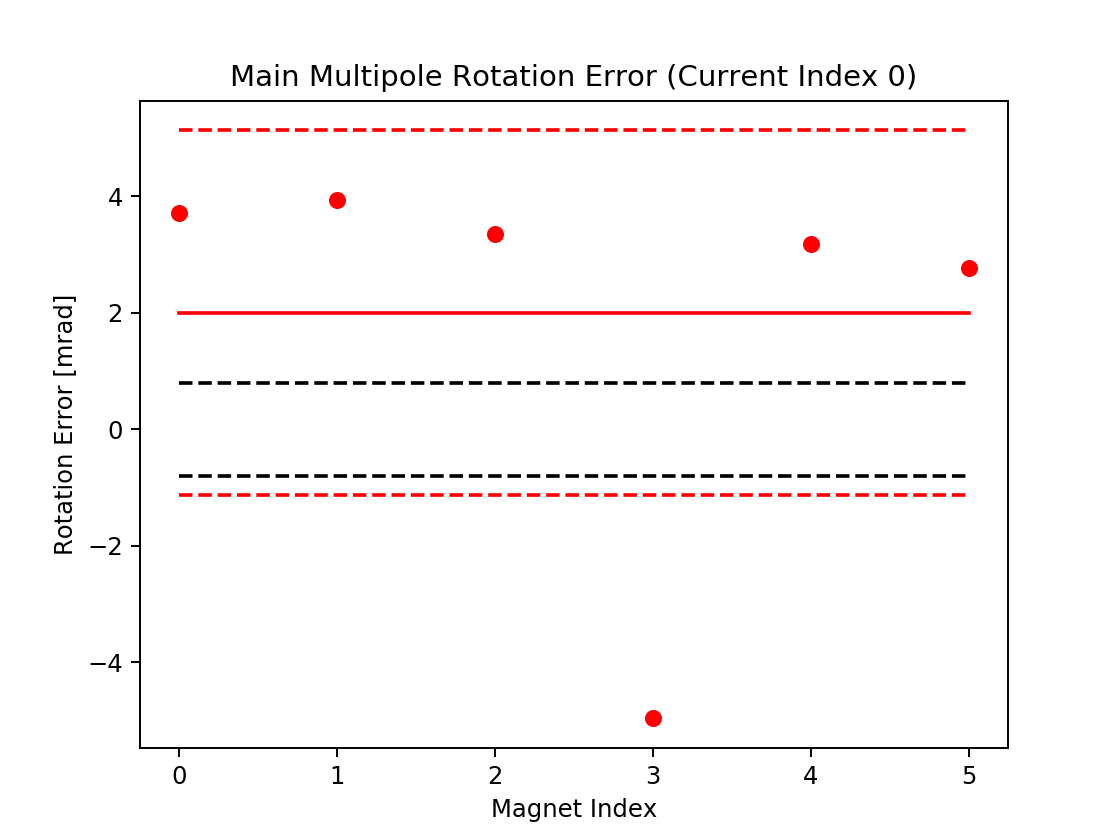

Angle error (Spec): +0.800 mrad
Angle error (Avg) : +2.002 mrad
Angle error (Std) : +3.135 mrad


<IPython.core.display.Javascript object>


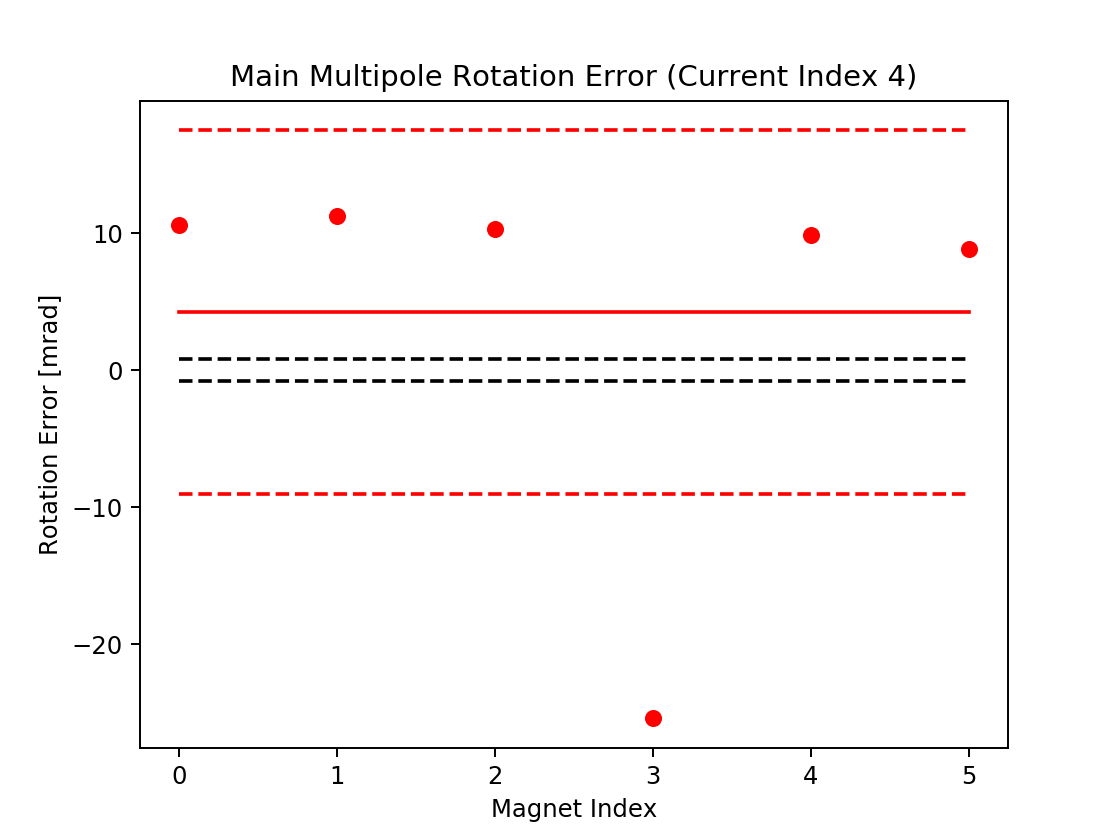

Angle error (Spec): +0.800 mrad
Angle error (Avg) : +4.255 mrad
Angle error (Std) : +13.285 mrad


<IPython.core.display.Javascript object>


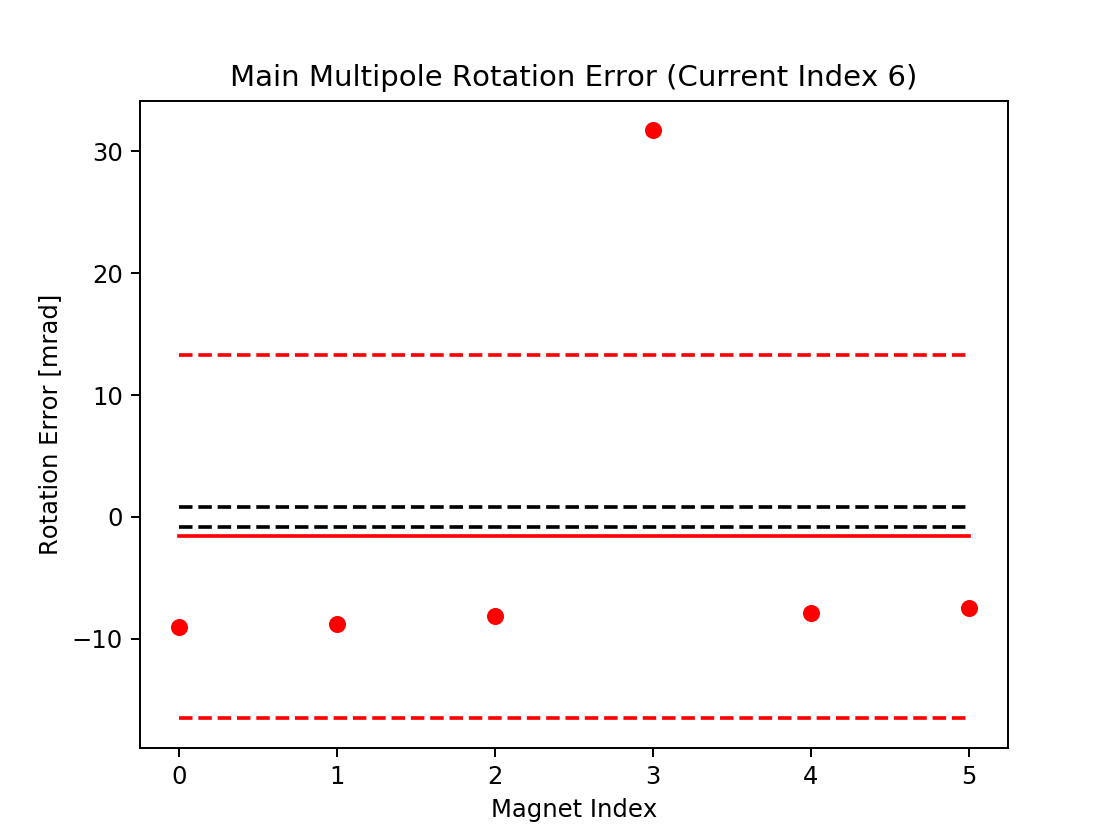

Angle error (Spec): +0.800 mrad
Angle error (Avg) : -1.594 mrad
Angle error (Std) : +14.910 mrad


<IPython.core.display.Javascript object>


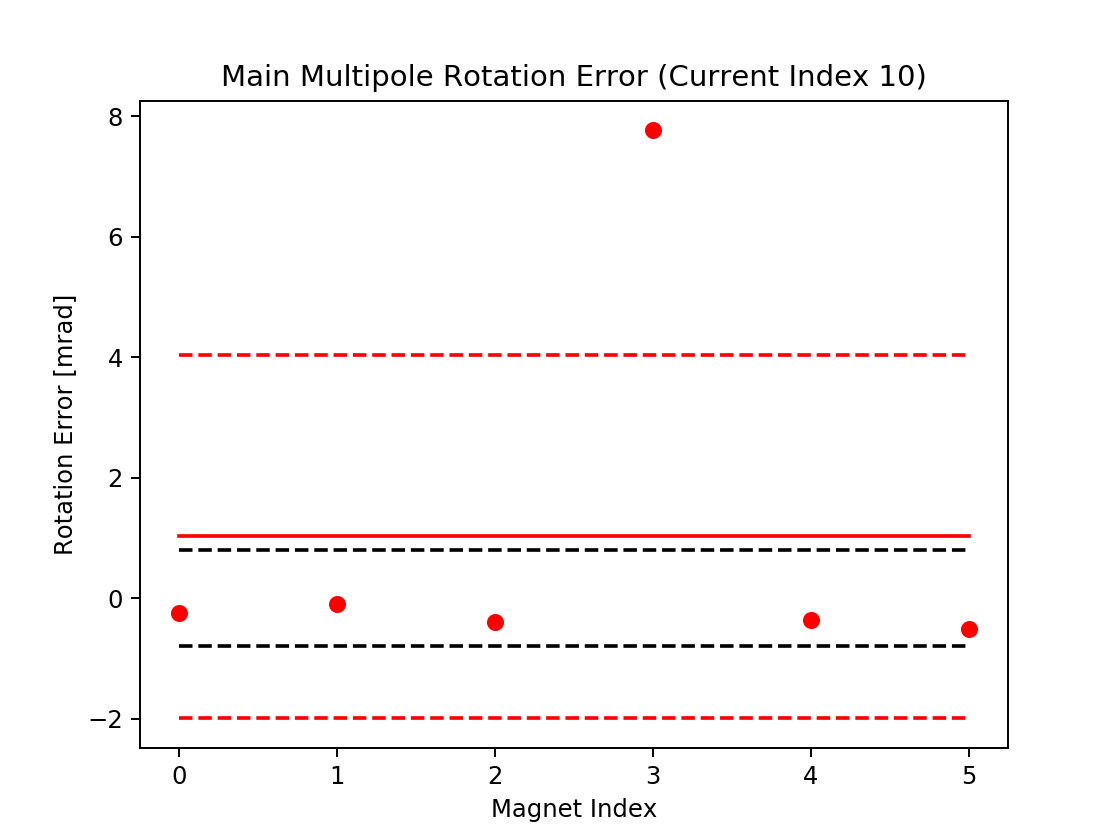

Angle error (Spec): +0.800 mrad
Angle error (Avg) : +1.025 mrad
Angle error (Std) : +3.018 mrad


In [9]:
plt.figure()
data.rotation_error_vs_current_plot('M1', 0.15, plt)
plt.show()

curr_idx = [0, 4, 6, 10]  
for i in curr_idx:
    plt.figure()
    spec, avg, std = data.rotation_error_plot('M1', plt, i)
    plt.show()
    print('Angle error (Spec): {:+.3f} mrad'.format(spec))
    print('Angle error (Avg) : {:+.3f} mrad'.format(avg))
    print('Angle error (Std) : {:+.3f} mrad'.format(std))

## Hysteresis

<IPython.core.display.Javascript object>


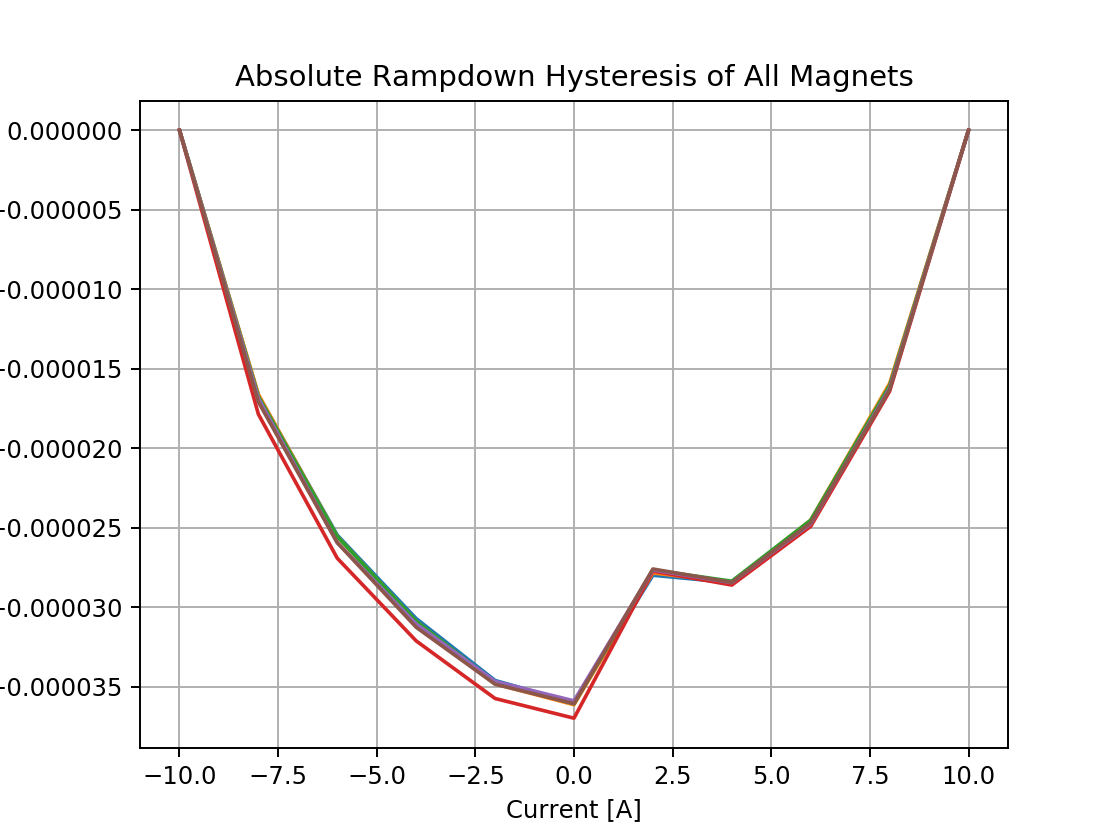

<IPython.core.display.Javascript object>


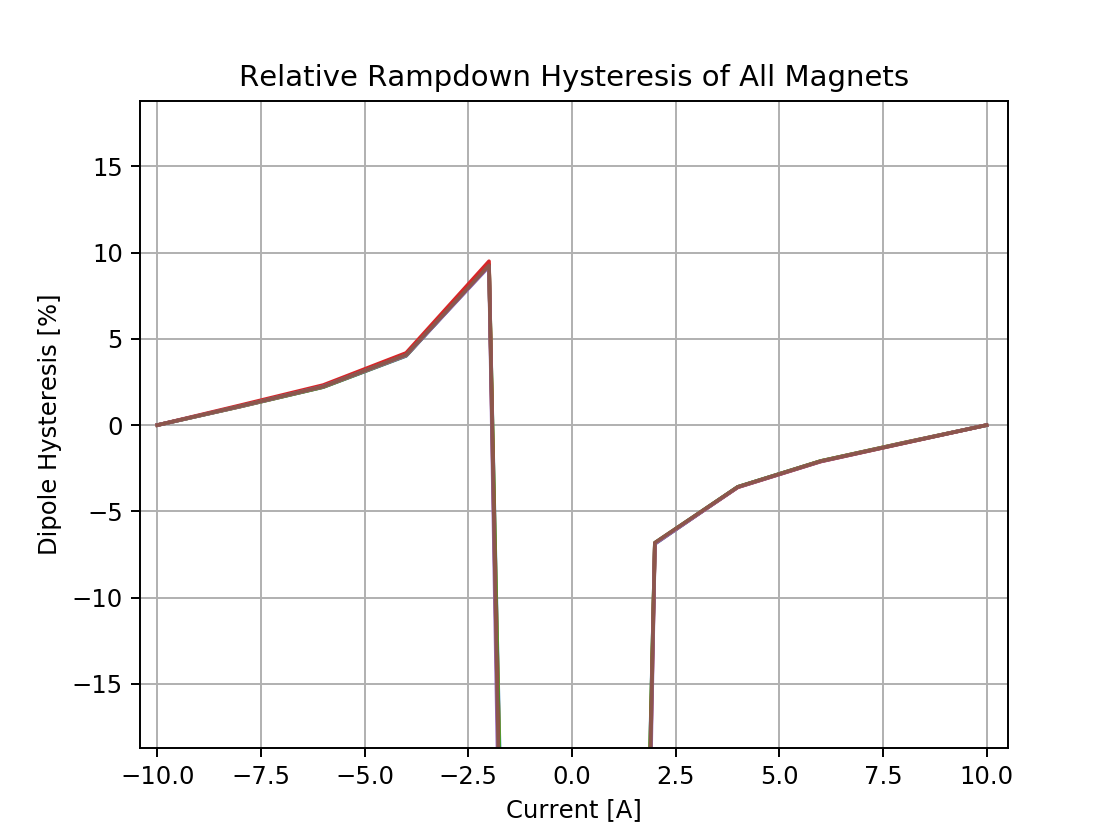

In [10]:
# Absolute
plt.figure()
data.hysteresis_absolute_plot('M1', plt)
plt.show()

# Relative
plt.figure()
data.hysteresis_relative_plot('M1', plt)
plt.show()

## Save Excitation Data Files

In [15]:
# save average excitation data to file

data.save_excdata_average('M1')

In [13]:
# save excitation data of all magnets to separate files
data.save_excdata_individuals('M1')

## Multipoles

<IPython.core.display.Javascript object>


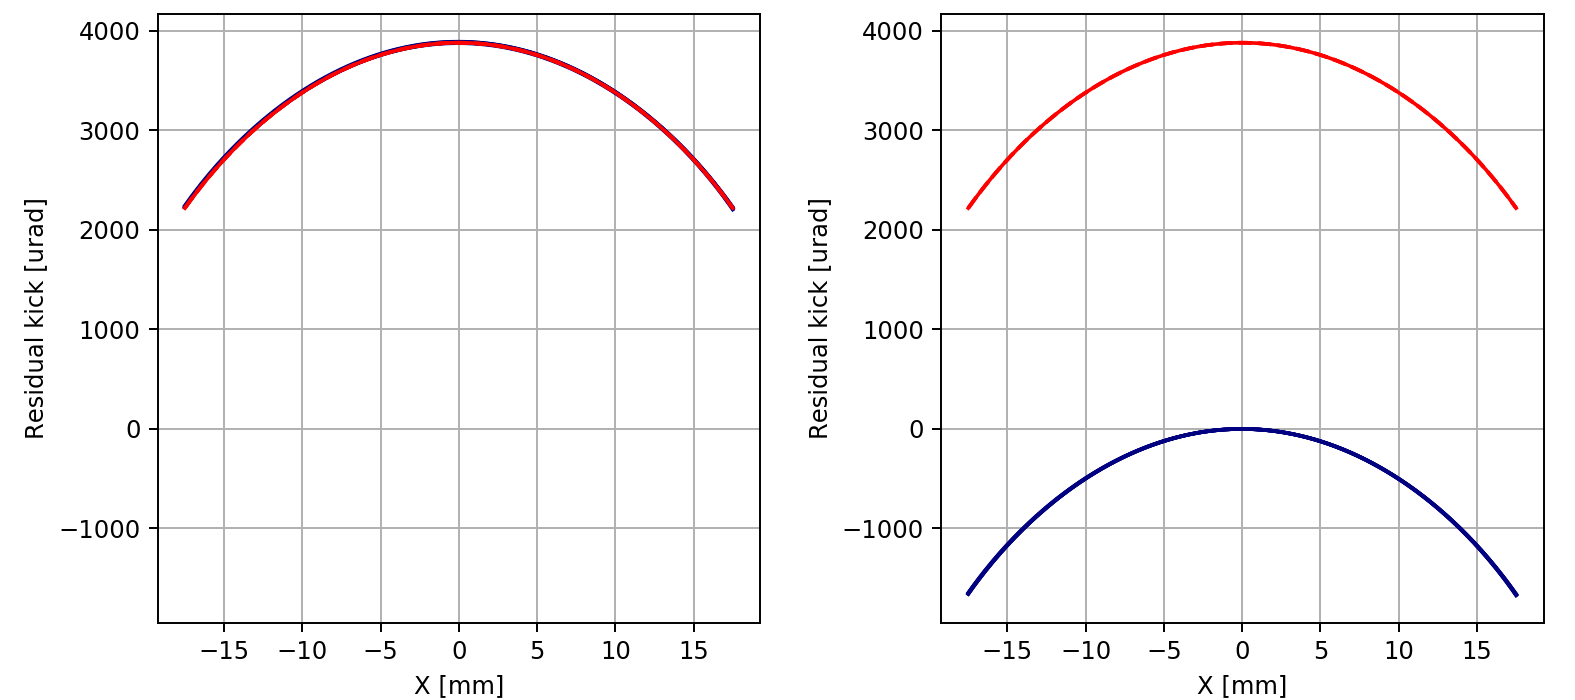

<IPython.core.display.Javascript object>


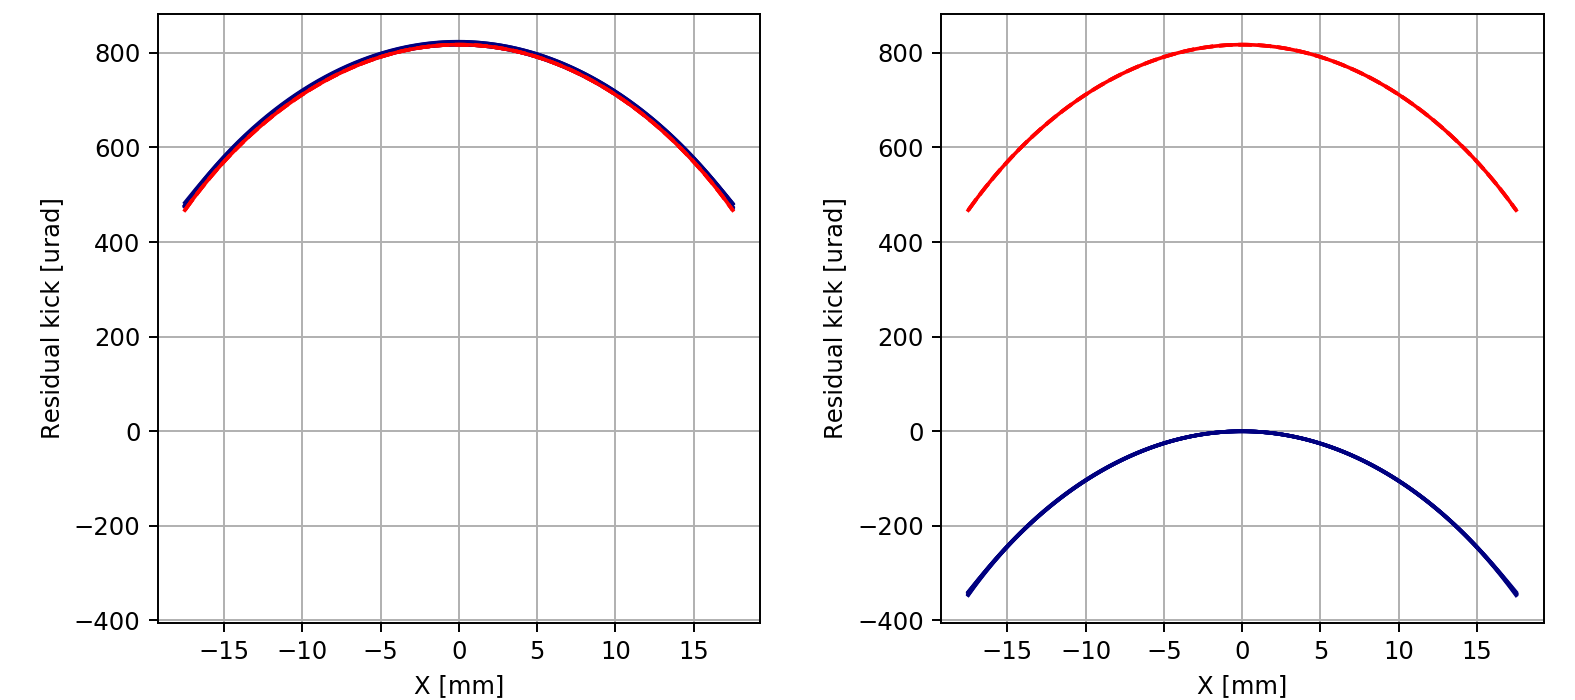

<IPython.core.display.Javascript object>


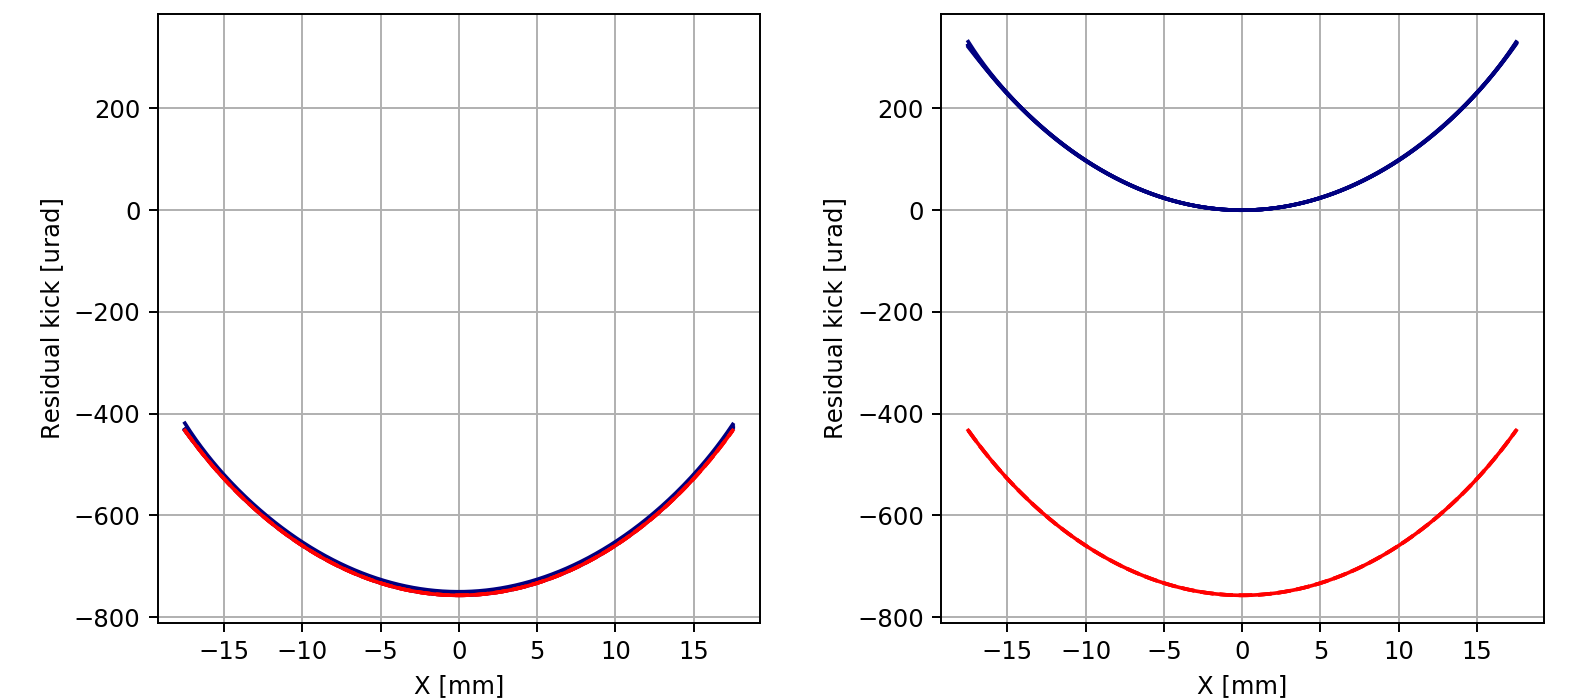

<IPython.core.display.Javascript object>


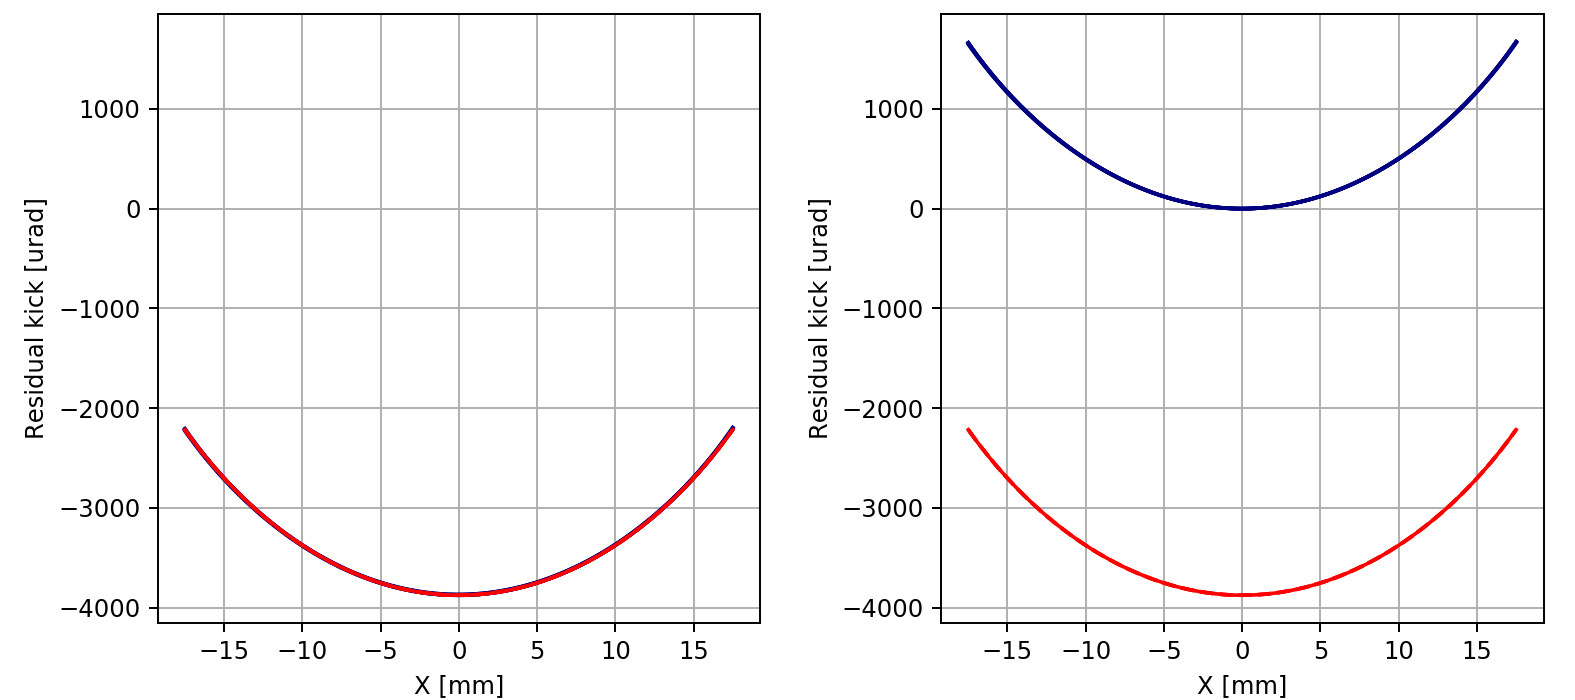

In [11]:
# Horizontal kick

curr_idx = [0, 4, 6, 10]  
for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kickx_plot('M1', plt, curr_idx=i, energy=0.15, 
                                     excluded_monomials_plot1=(),
                                     excluded_monomials_plot2=(1,),)
    plt.show()

<IPython.core.display.Javascript object>


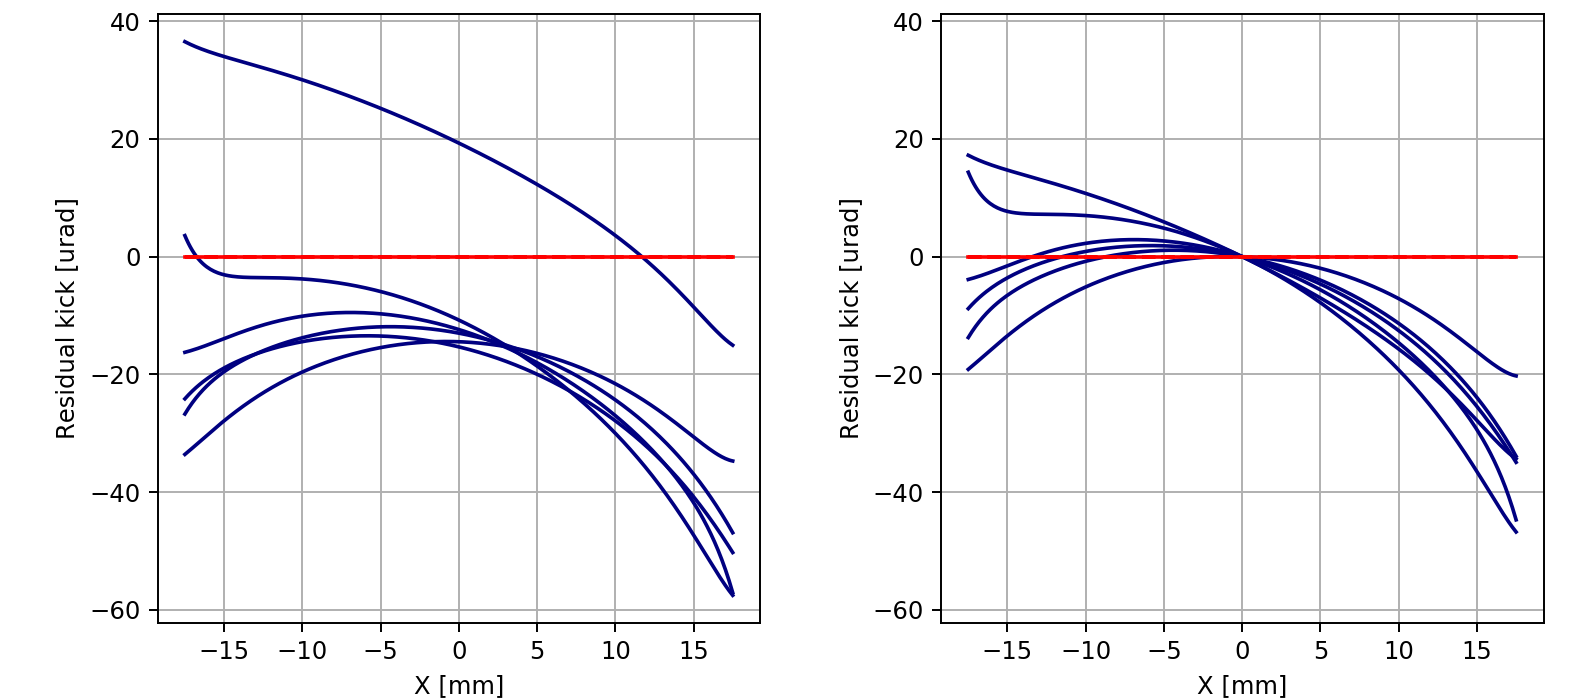

<IPython.core.display.Javascript object>


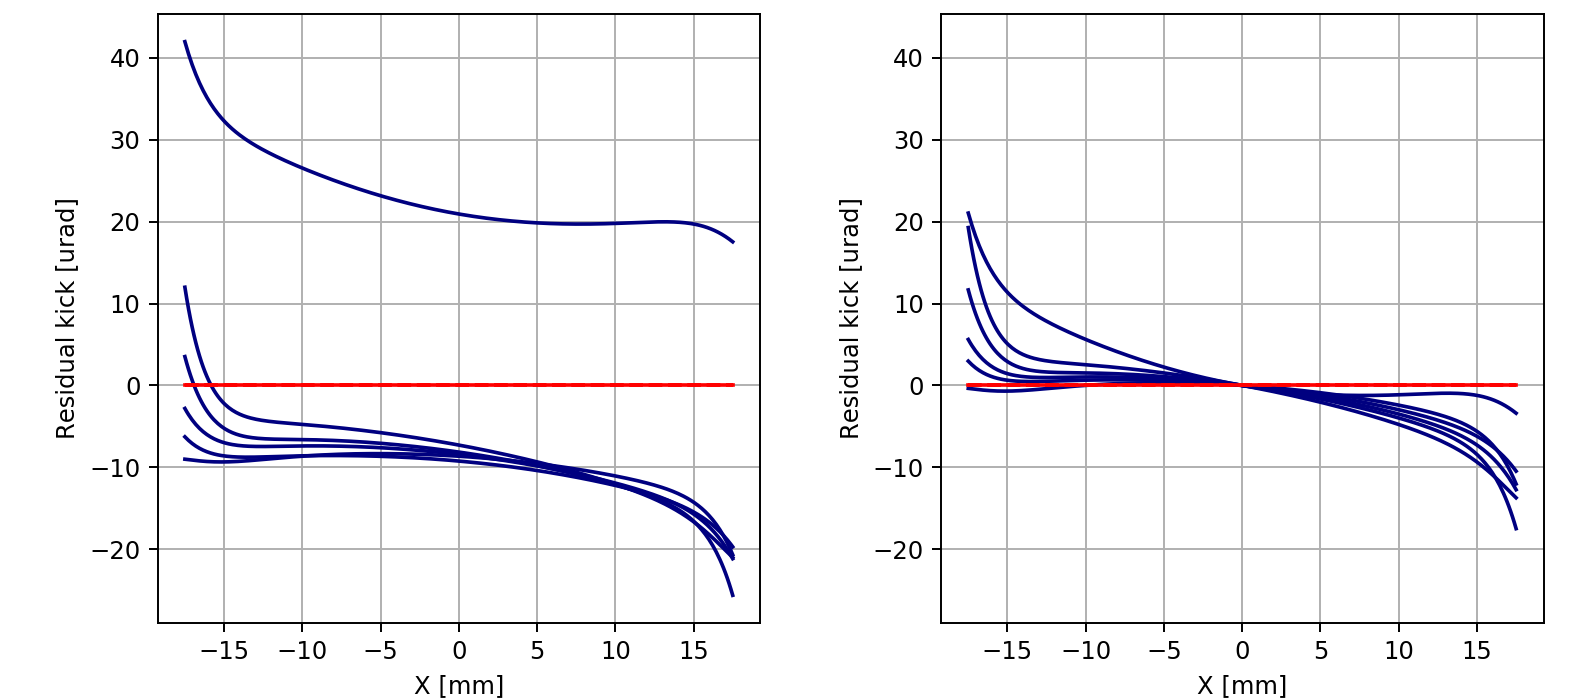

<IPython.core.display.Javascript object>


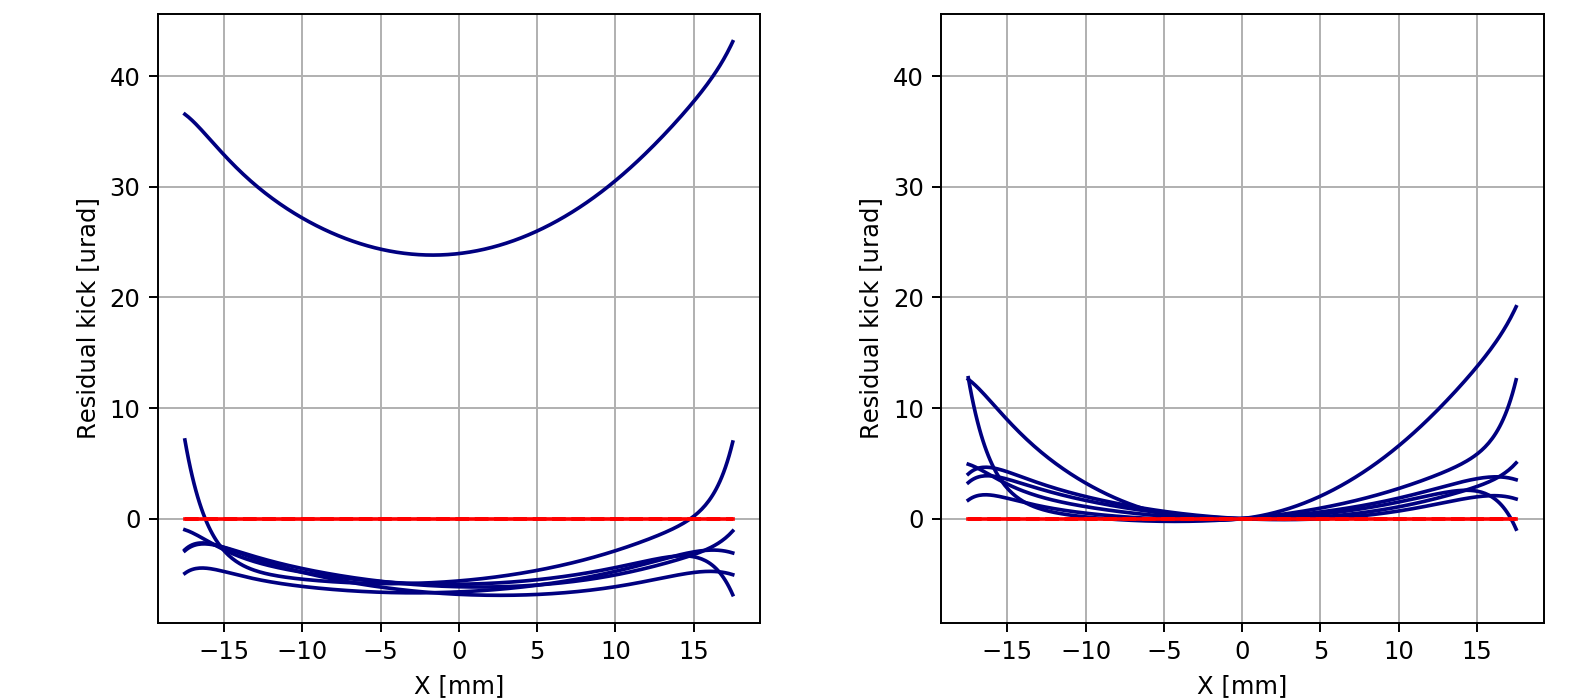

<IPython.core.display.Javascript object>


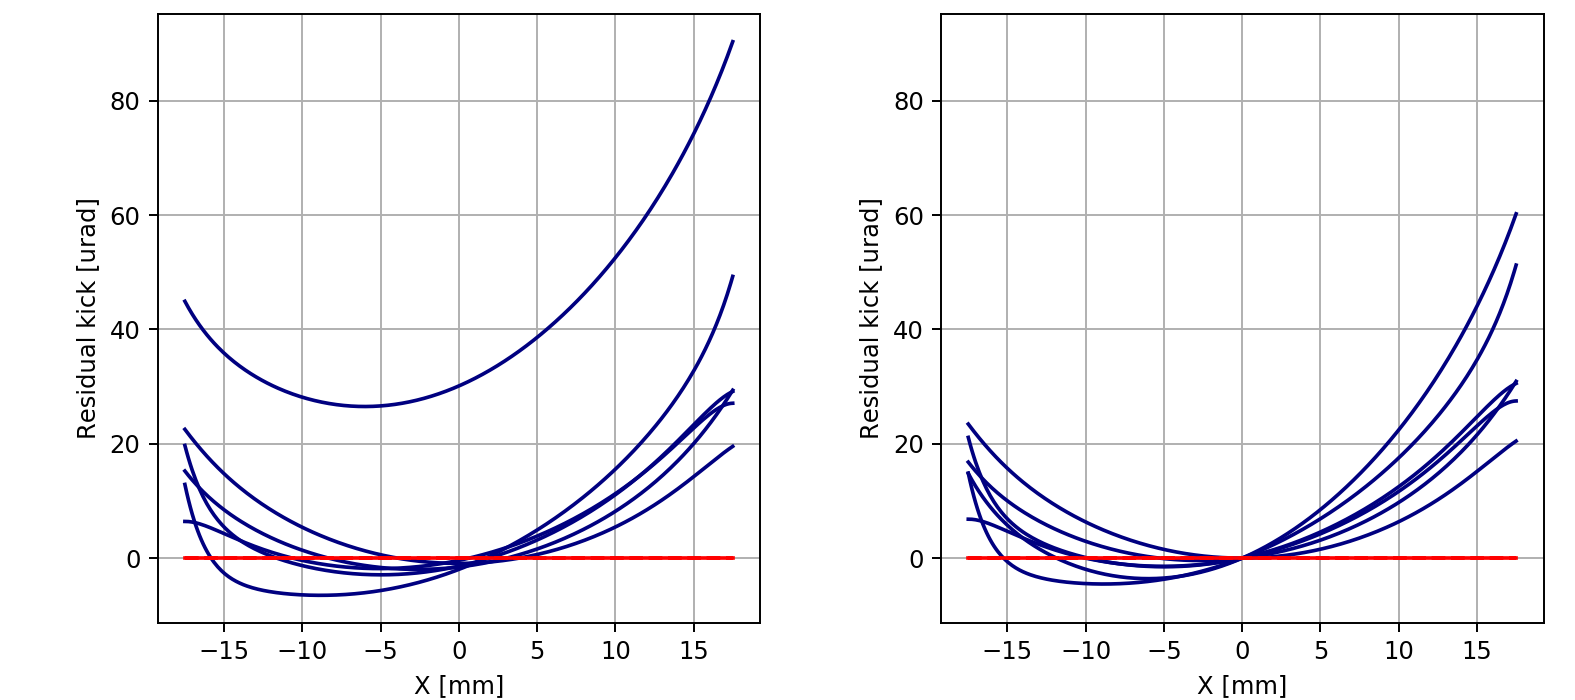

In [12]:
# Vertical kick

curr_idx = [0, 4, 6, 10]
for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kicky_plot('M1', plt, curr_idx=i, energy=0.15, 
                                     excluded_monomials_plot1=(),
                                     excluded_monomials_plot2=(1,))
    plt.show()

# Magnets Sorting

In [16]:
med = 'M1'
print('Rampup')
c, bl = data.tmpl.get_rampup(med)
for i in range(len(c)):
    print('{:02d}: I = {:8.4f} A => BL = {:+.4f} T'.format(i, c[i], bl[i]))

Rampup
00: I = -10.0001 A => BL = -0.0019 T
01: I =  -8.0000 A => BL = -0.0016 T
02: I =  -6.0000 A => BL = -0.0012 T
03: I =  -4.0002 A => BL = -0.0008 T
04: I =  -2.0003 A => BL = -0.0004 T
05: I =  -0.0001 A => BL = -0.0000 T
06: I =   2.0001 A => BL = +0.0004 T
07: I =   4.0000 A => BL = +0.0008 T
08: I =   6.0000 A => BL = +0.0012 T
09: I =   8.0002 A => BL = +0.0015 T
10: I =  10.0003 A => BL = +0.0019 T


In [17]:
# Print Multipoles Files

currents, _ = data.tmpl.get_rampup('M1')
stdout = sys.stdout
for cidx in range(0,len(currents)):
    sys.stdout = open('MULTIPOLES-CH_{:02d}_{:+.0f}A.txt'.format(cidx+1, currents[cidx]), 'w')
    data.readme_multipoles_print('M1', cidx)
    sys.stdout.flush()
sys.stdout = stdout